# Import necessary libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the CSV and show its first rows

In [17]:
df = pd.read_csv('./survey-lung-cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Plot
Let's explore the Dataset and see what's going on inisde it.

### Age distribution

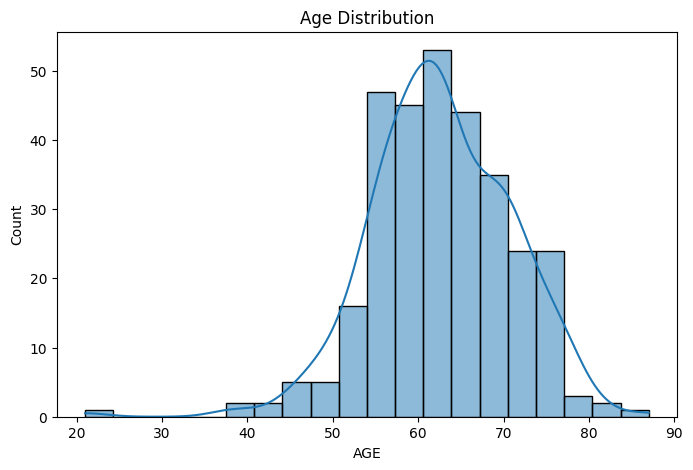

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df["AGE"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

### Gender distribution

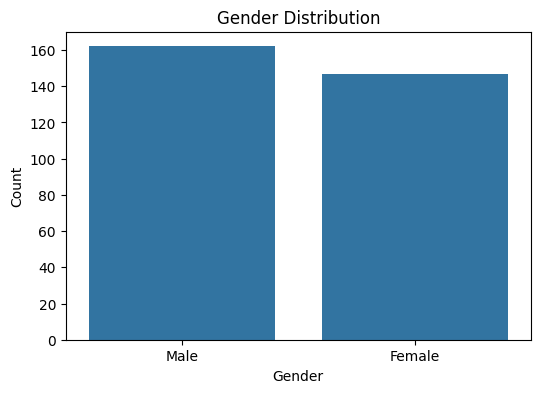

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["GENDER"].replace({"M": "Male", "F": "Female"}))
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

Text(0, 0.5, 'Count')

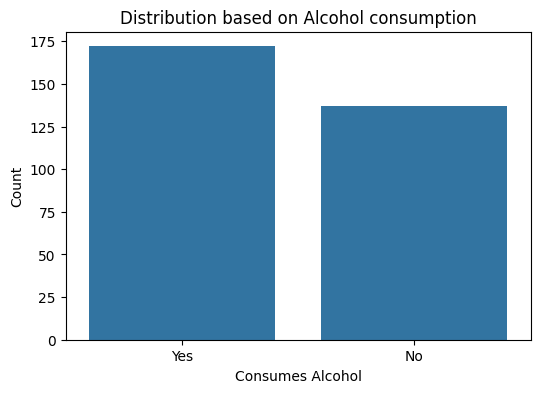

In [49]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["ALCOHOL CONSUMING"].replace({2: "Yes", 1: "No"}))
plt.title("Distribution based on Alcohol consumption")
plt.xlabel("Consumes Alcohol")
plt.ylabel("Count")

In the above Data Frame we convert 'Gender' to a boolean type indicating 0 as F and 1 as M.

In [21]:
df.loc[df['LUNG_CANCER'] == 'YES', 'LUNG_CANCER'] = 1
df.loc[df['LUNG_CANCER'] == 'NO', 'LUNG_CANCER'] = 0

df.loc[df['GENDER'] == 'F', 'GENDER'] = 0
df.loc[df['GENDER'] == 'M', 'GENDER'] = 1

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


So we have totally 309 records with 16 columns

In [22]:
df.shape

(309, 16)

See how many people in the dataset have Lung Cancer and how many don't.

In [23]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

As the 'LUNG_CANCER' is the column we need to predict it, we seperate it from the DataFrame into another variable. So 'x' is our Features and 'y' is our outputs.

In [24]:
x = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

Then we split our DataFrame to training and testing DataFrames by a ratio of 80 to 20 percent.

In [25]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [26]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: object

In [27]:
x = np.array(x)
y = np.array(y)

In [28]:
x

array([[1, 69, 1, ..., 2, 2, 2],
       [1, 74, 2, ..., 2, 2, 2],
       [0, 59, 1, ..., 2, 1, 2],
       ...,
       [1, 58, 2, ..., 1, 1, 2],
       [1, 67, 2, ..., 2, 1, 2],
       [1, 62, 1, ..., 1, 2, 1]], shape=(309, 15), dtype=object)

In [29]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
print(y.dtype)
print(type(y))
y = y.astype(int)
print(y.dtype)

object
<class 'numpy.ndarray'>
int64


# Normalize

In [31]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [32]:
x

array([[ 0.95257934,  0.77185028, -1.13529242, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [ 0.95257934,  1.38182914,  0.88083033, ...,  0.74873631,
         1.06350105,  0.892475  ],
       [-1.04978132, -0.44810745, -1.13529242, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       ...,
       [ 0.95257934, -0.57010322,  0.88083033, ..., -1.33558369,
        -0.94029056,  0.892475  ],
       [ 0.95257934,  0.52785873,  0.88083033, ...,  0.74873631,
        -0.94029056,  0.892475  ],
       [ 0.95257934, -0.08212013, -1.13529242, ..., -1.33558369,
         1.06350105, -1.12047956]], shape=(309, 15))

# Split to Train/Test

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

So 'x_train' is our features of training, 'x_test' is our features of testing, 'y_train' is the training outputs and 'y_test' is the test outputs.

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((247, 15), (62, 15), (247,), (62,))

In [35]:
print(np.unique(y_train))
print(type(y_train))

[0 1]
<class 'numpy.ndarray'>


From now on, we will try different ML algorithms on the data to find out which one fits better and has better accuracy.

# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

acc_train, acc_test

(0.9959514170040485, 0.9354838709677419)

In [39]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

confusion_matrix(y_test, y_pred_test)

array([[ 4,  1],
       [ 3, 54]])

In [40]:
p = precision_score(y_test, y_pred_test)
p

0.9818181818181818

In [41]:
r = recall_score(y_test, y_pred_test)
r

0.9473684210526315